In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,PolynomialFeatures,MinMaxScaler,RobustScaler
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.model_selection import cross_val_score,learning_curve,GridSearchCV,train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel,SelectKBest,f_classif
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import AdaBoostClassifier , RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from warnings import filterwarnings

In [2]:
pd.set_option("display.max_columns",None)
filterwarnings("ignore")

In [3]:
data=pd.read_csv("water_potability.csv")

In [4]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
data.shape

(3276, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
columns=data.columns.to_list()
print(columns)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [15]:
data["Potability"].describe()

count    3276.000000
mean        0.390110
std         0.487849
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Potability, dtype: float64

<AxesSubplot:ylabel='Potability'>

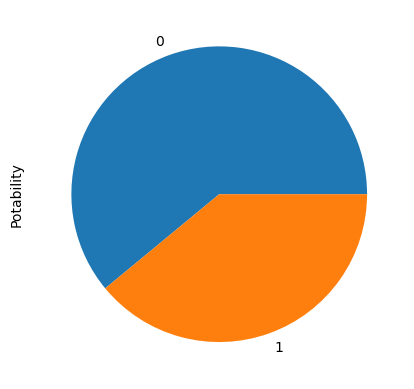

In [22]:
data["Potability"].value_counts().plot.pie()

In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

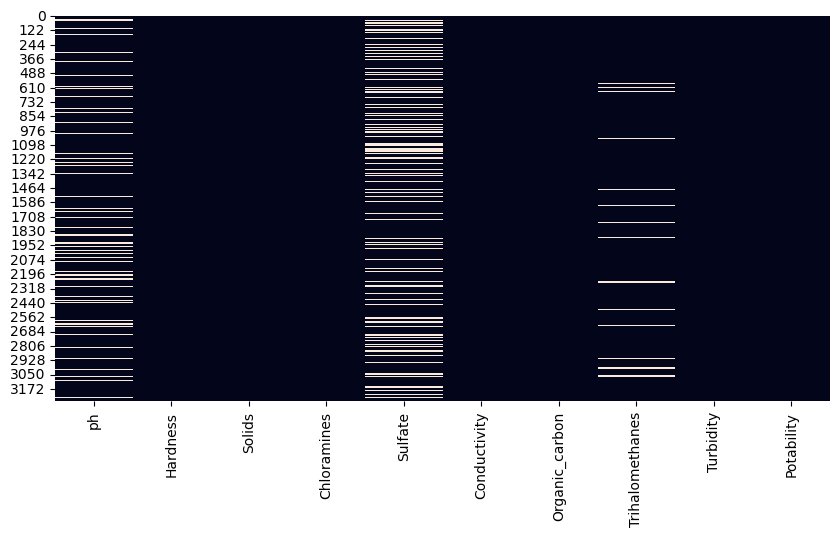

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),cbar=False)
plt.show()

In [23]:
columns_missing_values=["ph","Sulfate","Trihalomethanes"]

In [32]:
for col in columns_missing_values:
    print(f"{col:-<20}{(data[col].isnull().sum()/data.shape[0])*100}")
print(data[columns_missing_values].describe())
    

ph------------------14.987789987789988
Sulfate-------------23.84004884004884
Trihalomethanes-----4.945054945054945
                ph      Sulfate  Trihalomethanes
count  2785.000000  2495.000000      3114.000000
mean      7.080795   333.775777        66.396293
std       1.594320    41.416840        16.175008
min       0.000000   129.000000         0.738000
25%       6.093092   307.699498        55.844536
50%       7.036752   333.073546        66.622485
75%       8.062066   359.950170        77.337473
max      14.000000   481.030642       124.000000


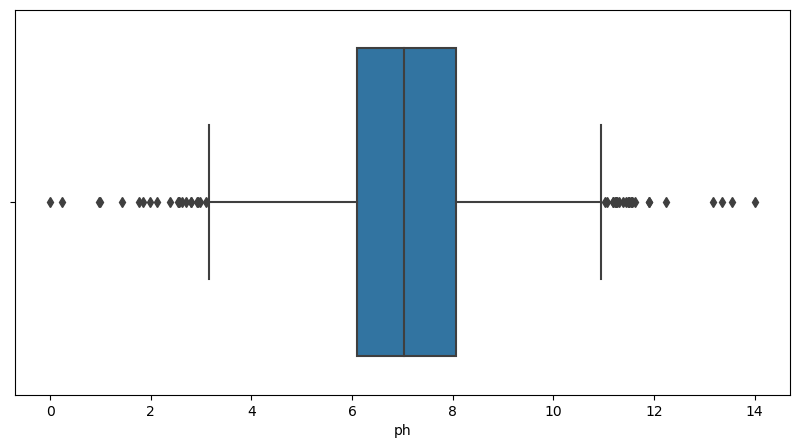

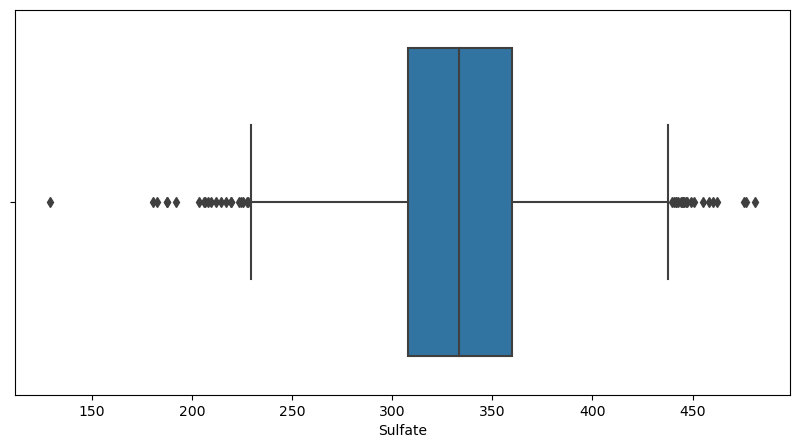

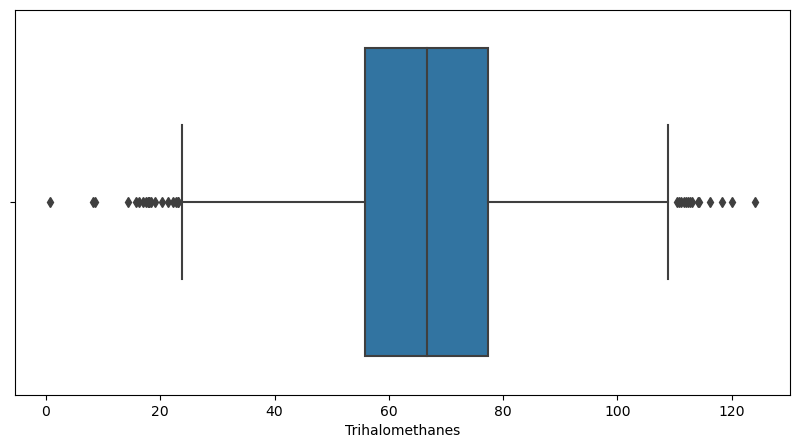

In [33]:
for col in columns_missing_values:
    plt.figure(figsize=(10,5))
    sns.boxplot(data[col])
    plt.show()

In [34]:
df=data.copy()

In [37]:
def imputation(df):
    df["ph"]=df["ph"].fillna(df["ph"].median())
    df["Trihalomethanes"]=df["Trihalomethanes"].fillna(df["Trihalomethanes"].median())
    df["Sulfate"]=df["Sulfate"].fillna(df["Sulfate"].median())
    return df

In [38]:
imputation(df)

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.036752  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.073546   
2     8.099124  224.236259  19909.541732     9.275884  333.073546   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.073546   
3273  9.419510  175.762646  33155.578218     7.350233  333.073546   
3274  5.126763  230.603758  11983.869376     6.303357  333.073546   
3275  7.874671  195.102299  17404.177061     7.509306  333.073546   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.622485   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [41]:
df[columns_missing_values].describe()

ph      Sulfate  Trihalomethanes
count  3276.000000  3276.000000      3276.000000
mean      7.074194   333.608364        66.407478
std       1.470040    36.143851        15.769958
min       0.000000   129.000000         0.738000
25%       6.277673   317.094638        56.647656
50%       7.036752   333.073546        66.622485
75%       7.870050   350.385756        76.666609
max      14.000000   481.030642       124.000000

In [42]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<AxesSubplot:ylabel='Potability'>

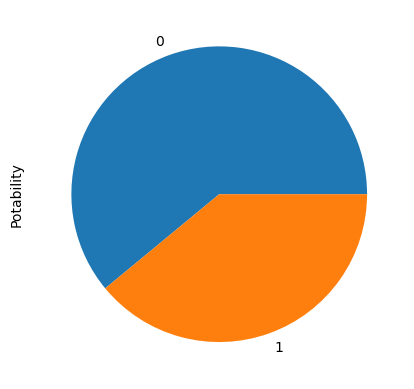

In [44]:
data["Potability"].value_counts().plot.pie()

In [47]:
columns_variables=df.drop(["Potability"],axis=1).columns.to_list()


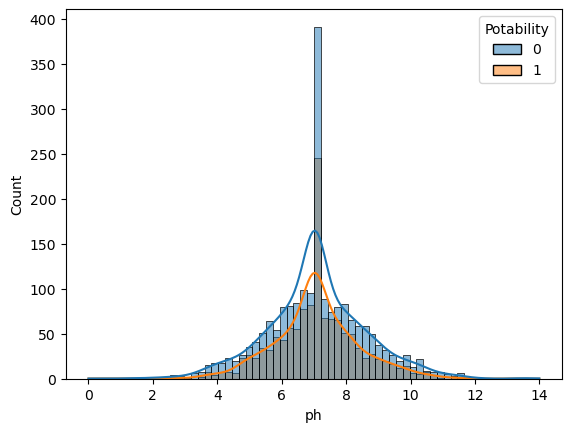

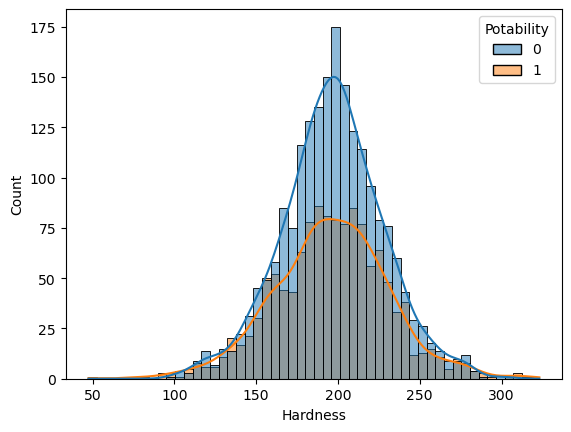

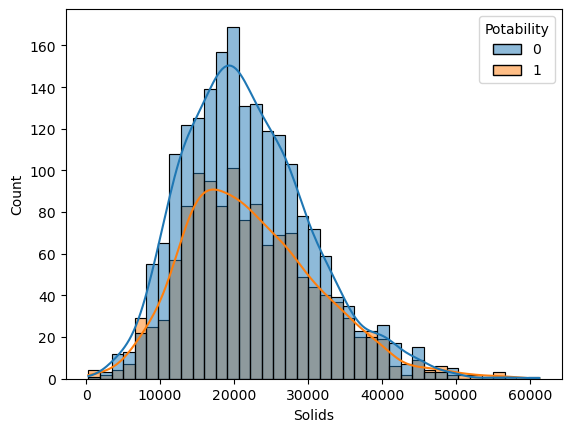

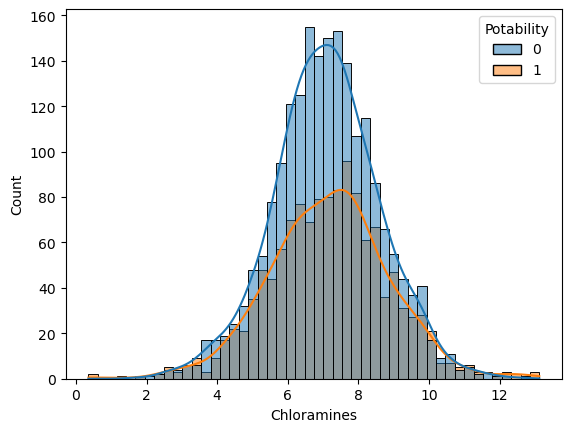

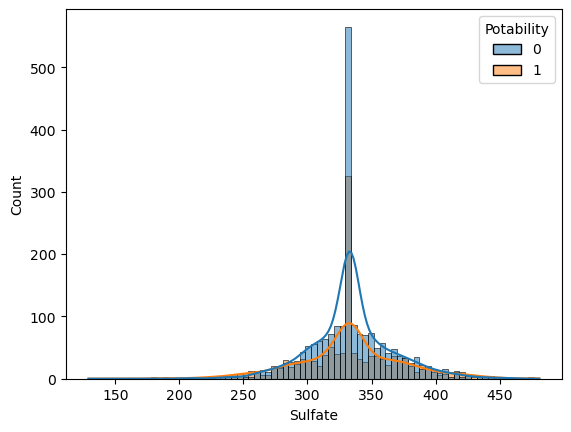

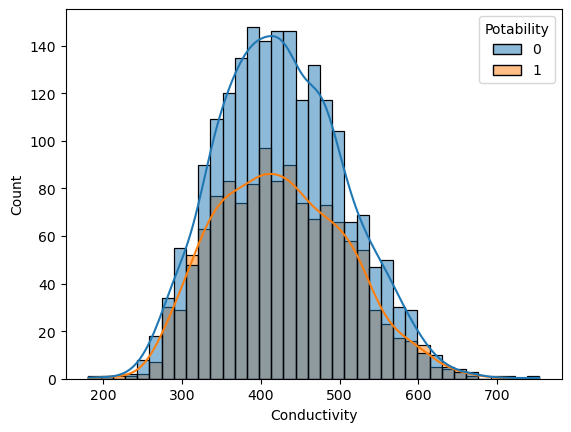

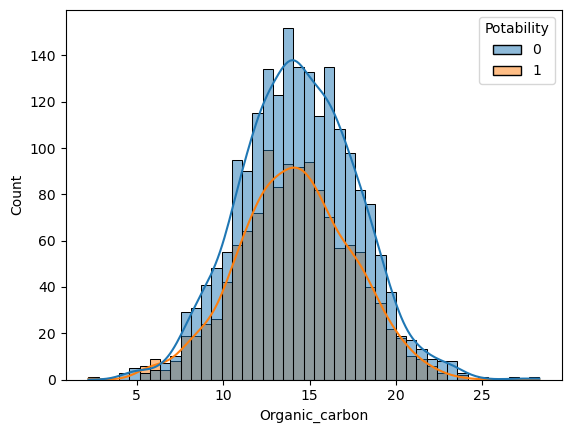

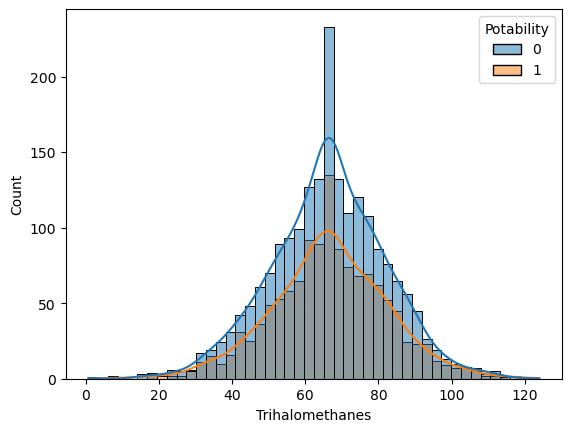

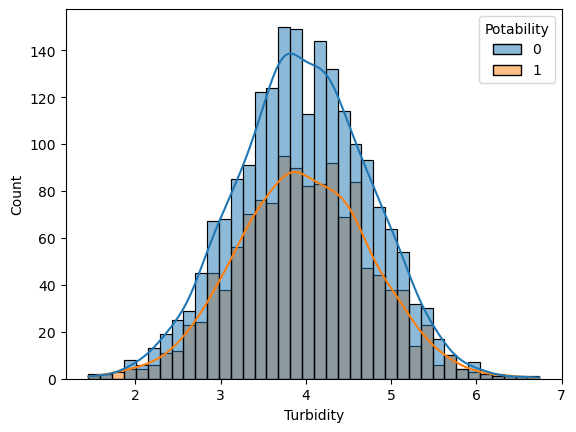

In [48]:
for col in columns_variables:
    sns.histplot(data=df,x=df[col],hue="Potability",kde=True)
    plt.show()


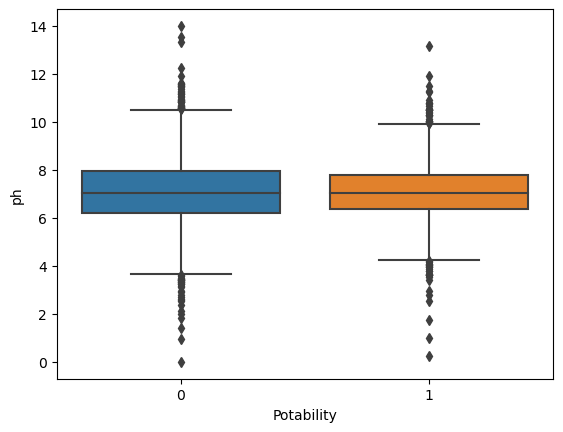

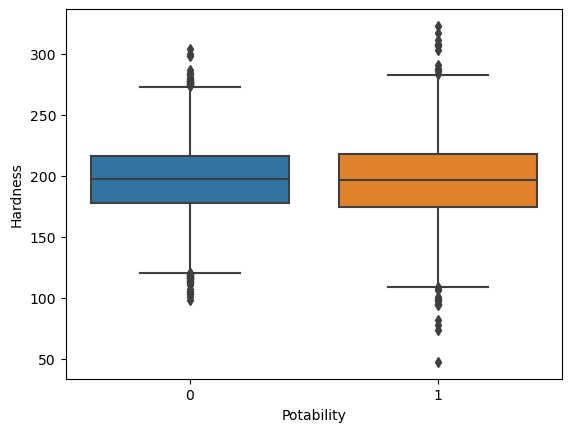

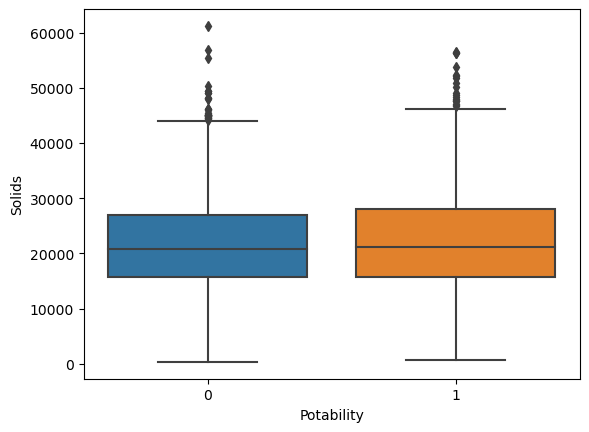

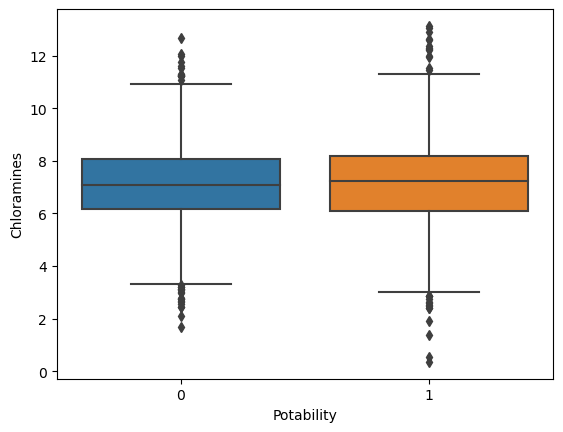

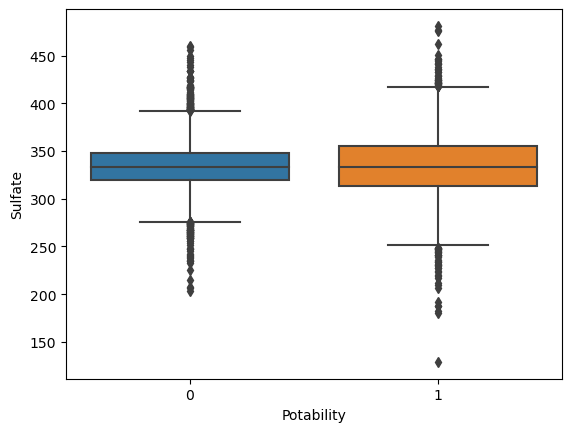

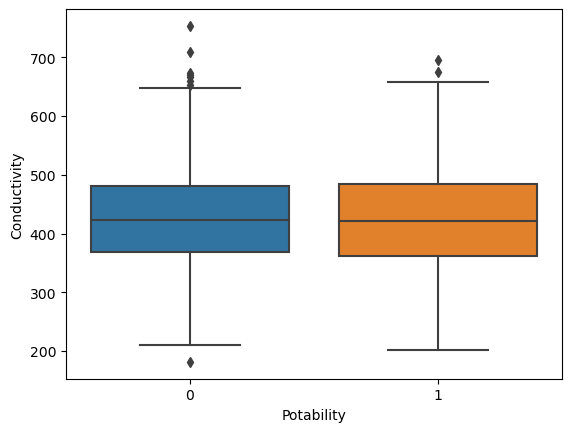

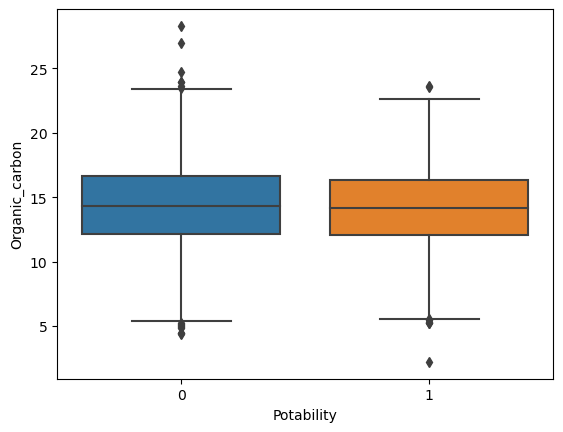

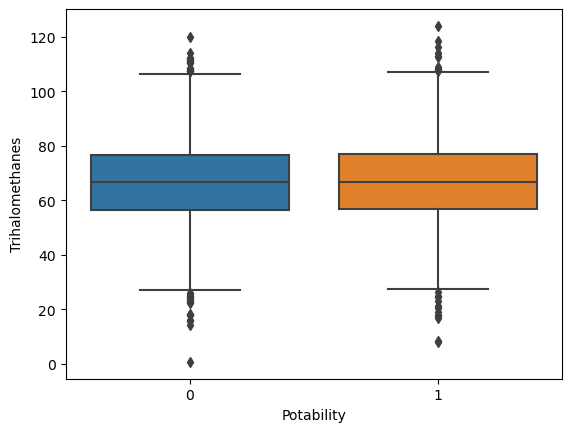

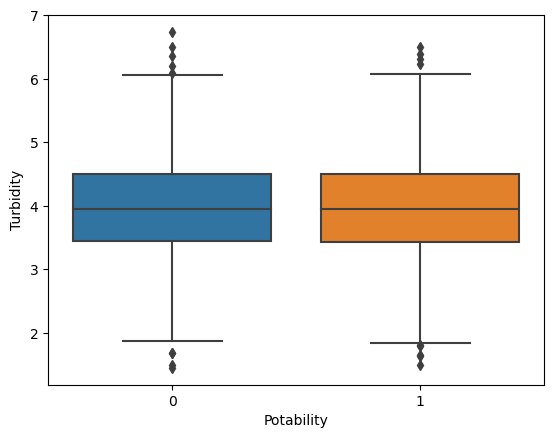

In [51]:
for col in columns_variables:
    sns.boxplot(x=df["Potability"],y=df[col],data=df)
    plt.show()

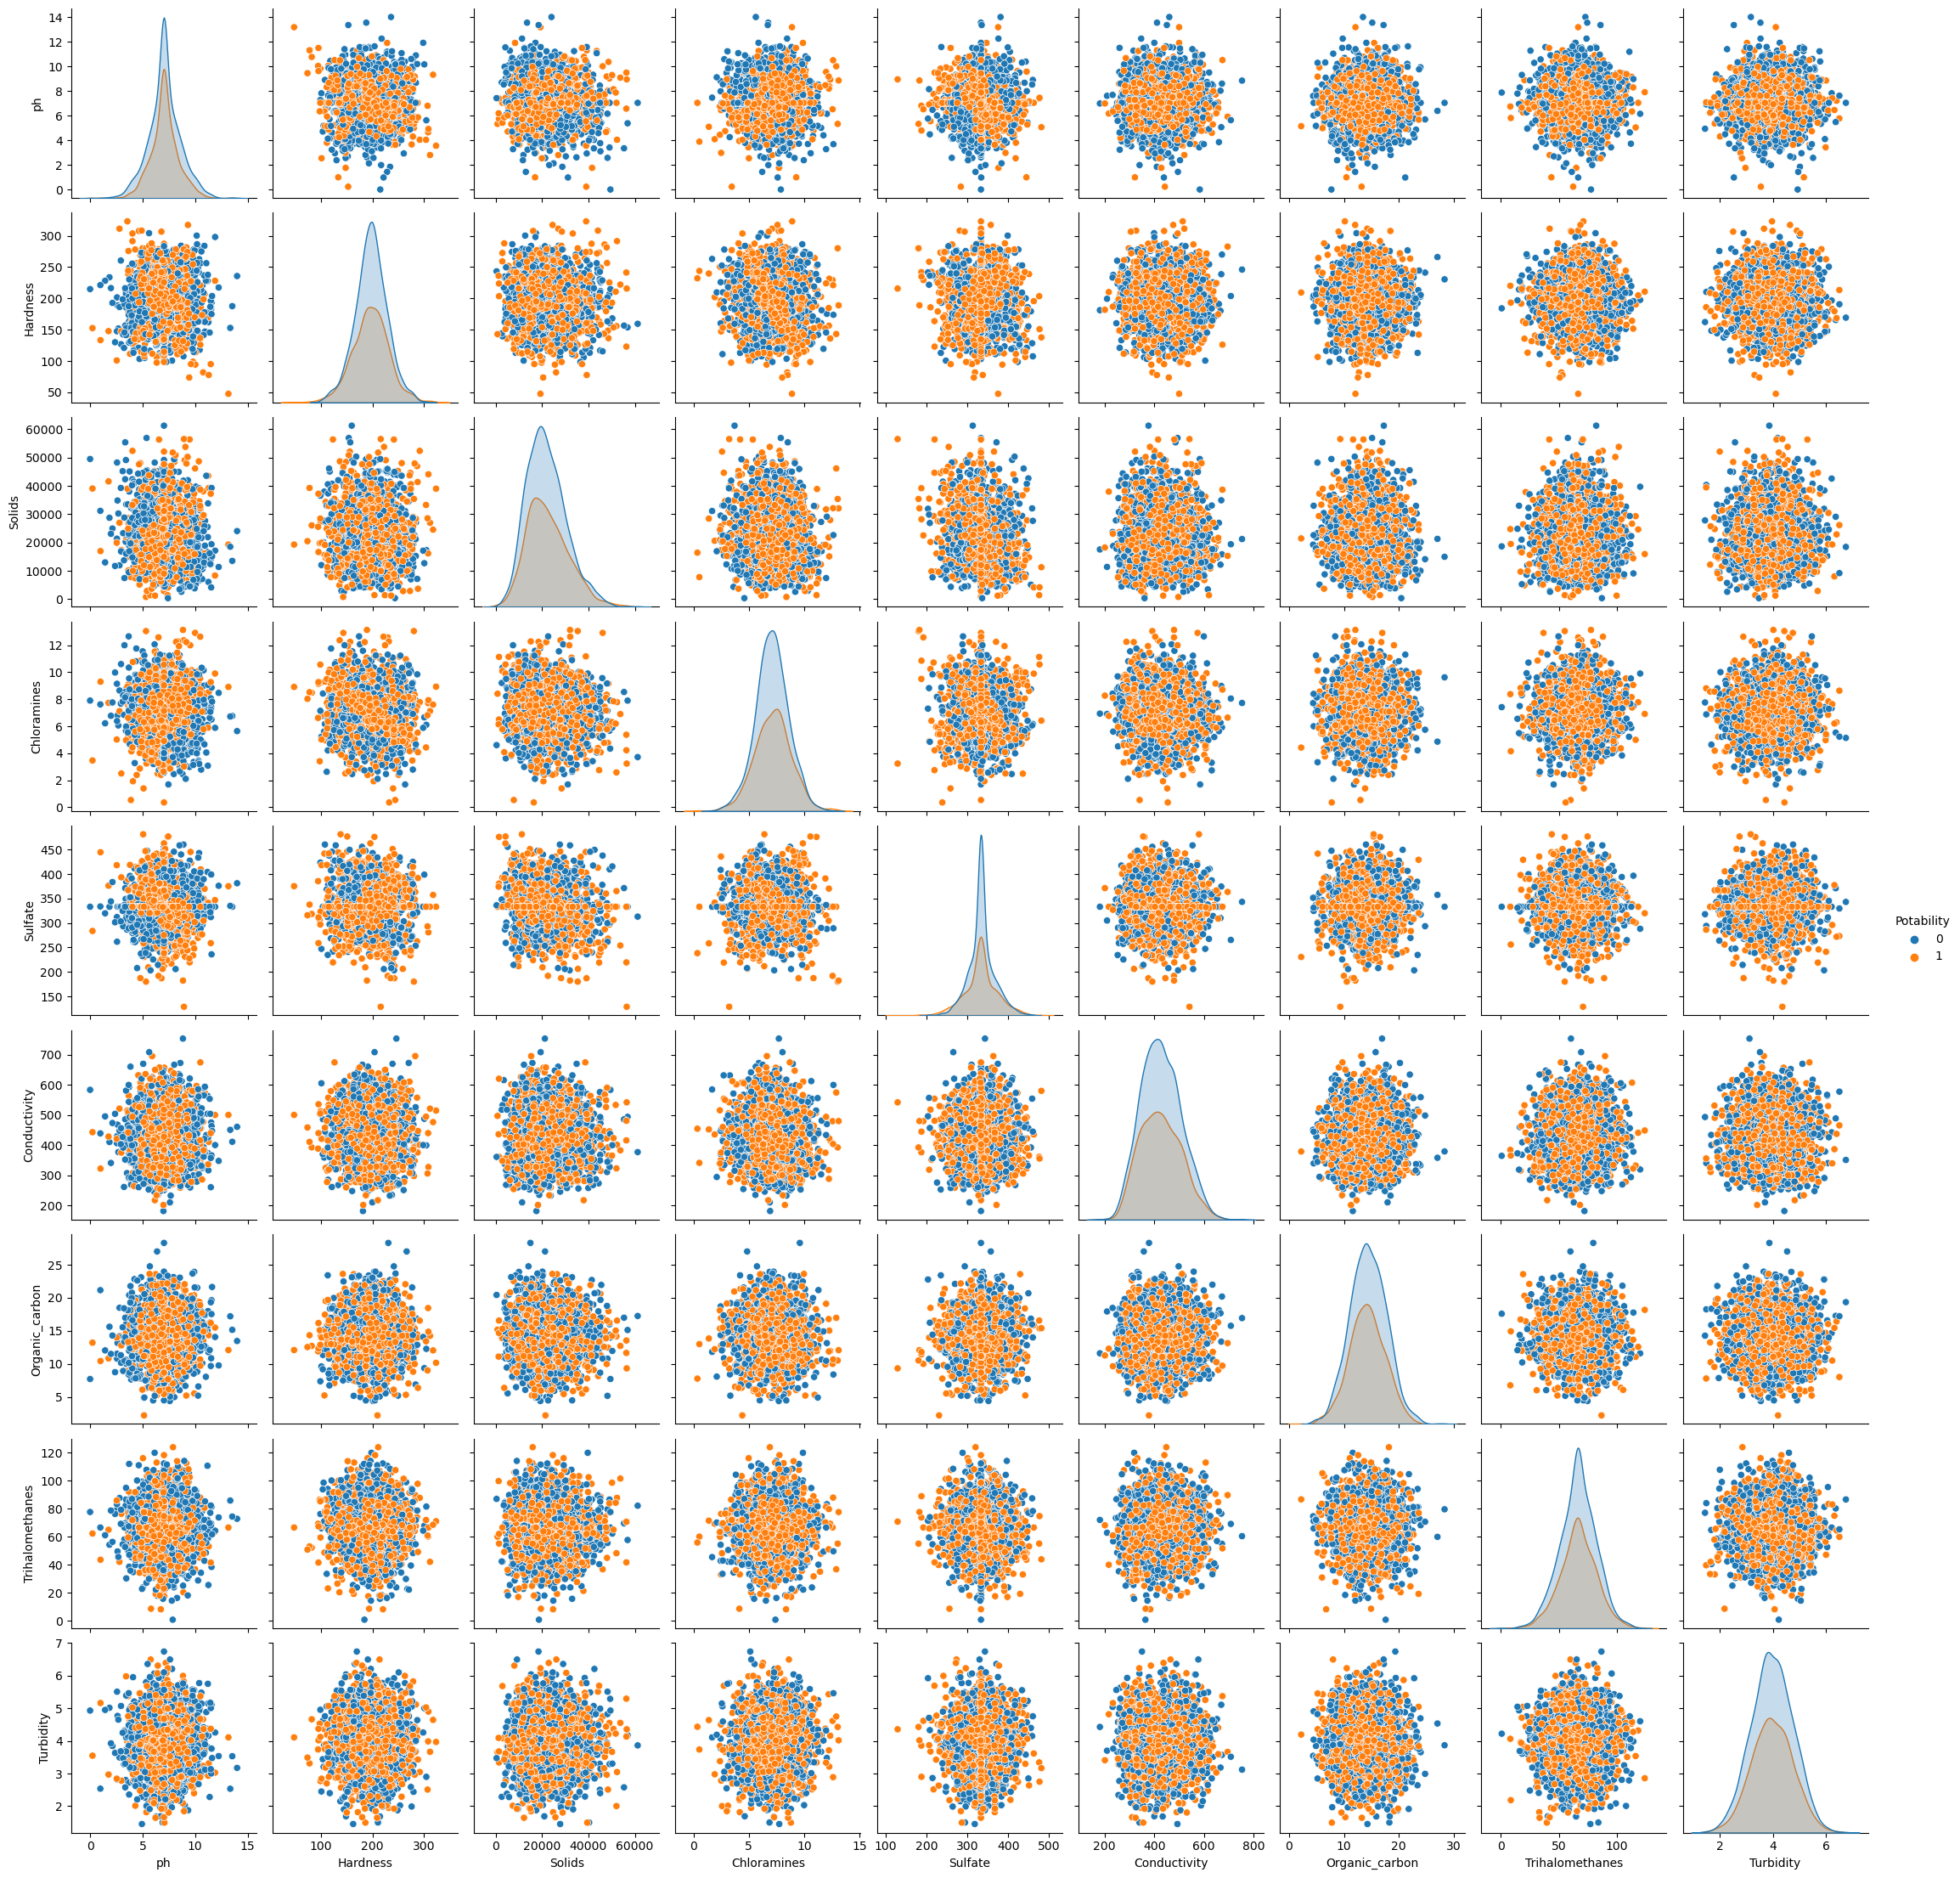

In [52]:
sns.pairplot(df,hue="Potability")

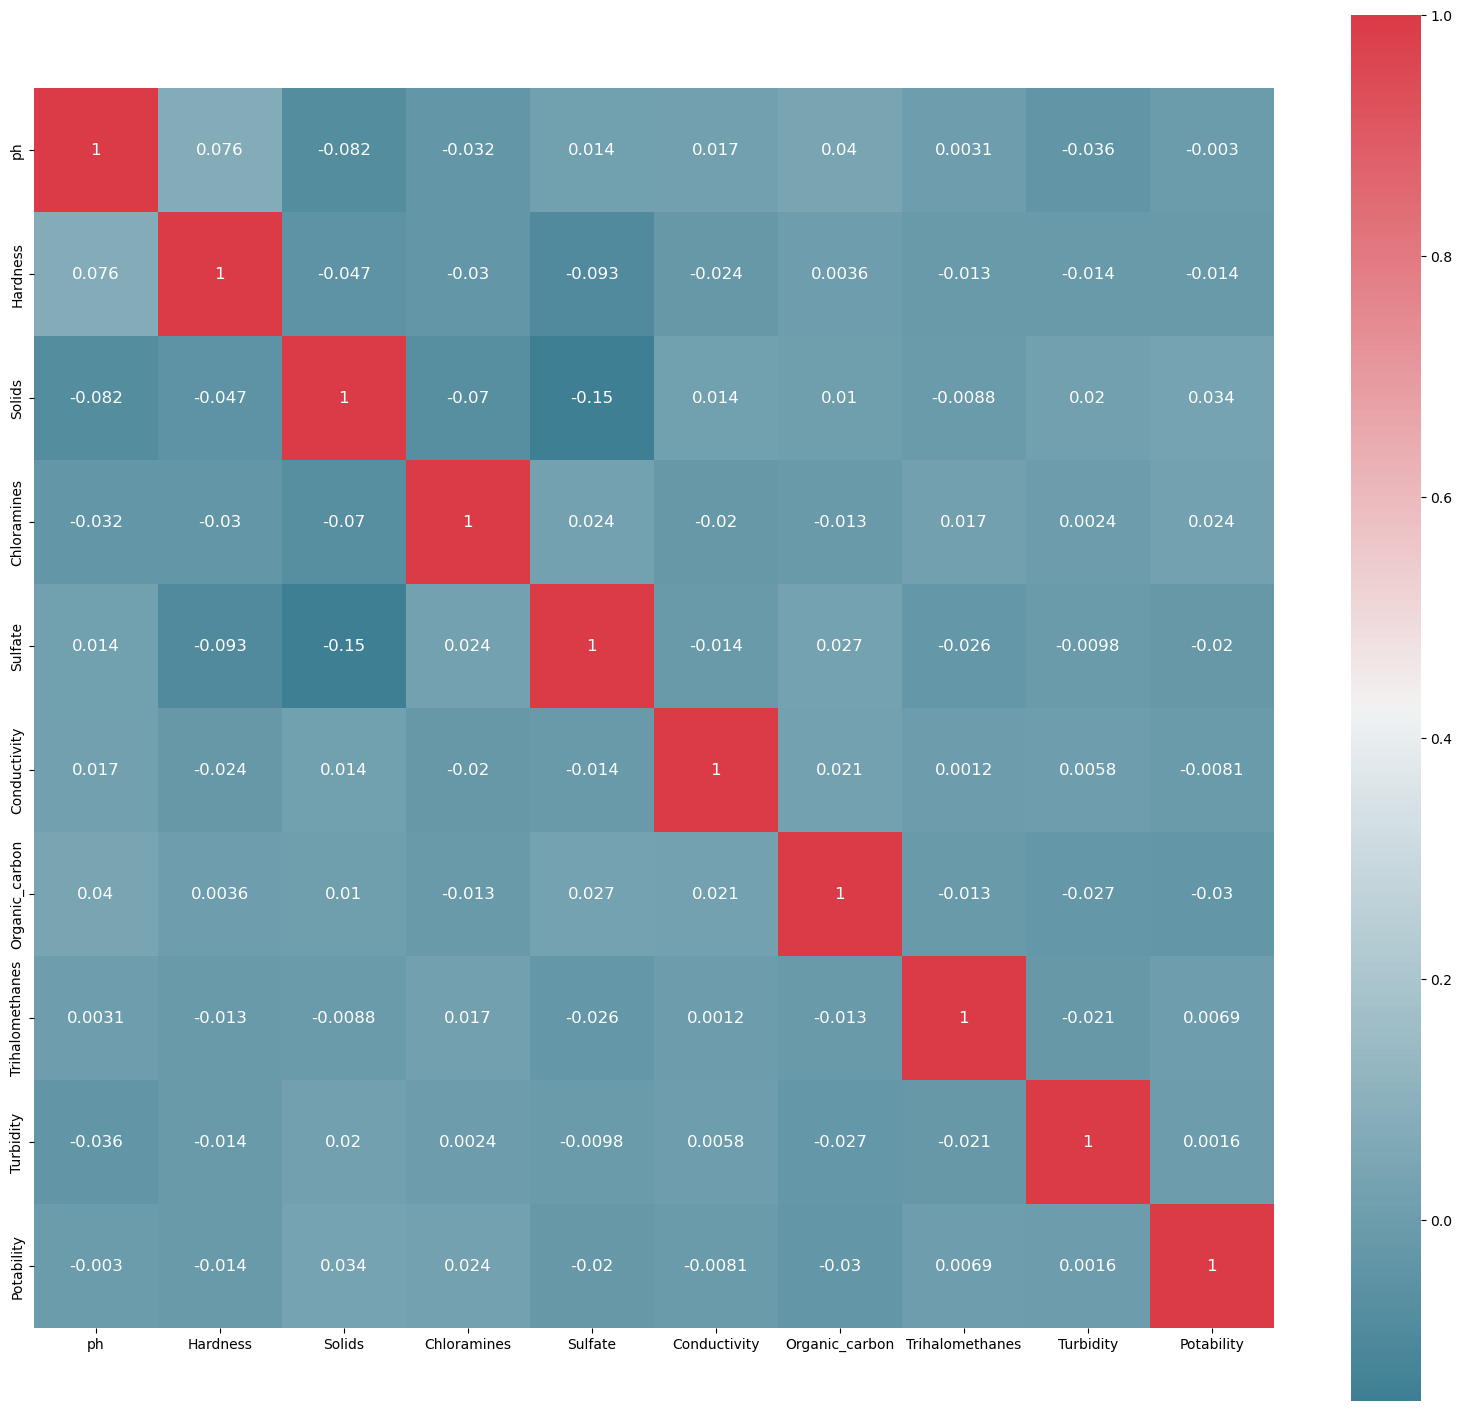

In [66]:
def plot_correlation_map(data):
    corr=data.corr()
    s,ax=plt.subplots(figsize=(20,20))
    cmap=sns.diverging_palette(220,10,as_cmap=True)
    s=sns.heatmap(corr,cmap=cmap,square=True,cbar_kws={'shrink':.9},ax=ax,annot=True,annot_kws={'fontsize':12})
plot_correlation_map(df)

In [99]:
print(Potability_Yes:=df[df["Potability"]==1].mean())
print(Potability_No:=df[df["Potability"]==0].mean())

ph                     7.068655
Hardness             195.800744
Solids             22383.991018
Chloramines            7.169338
Sulfate              332.683125
Conductivity         425.383800
Organic_carbon        14.160893
Trihalomethanes       66.543247
Turbidity              3.968328
Potability             1.000000
dtype: float64
ph                     7.077736
Hardness             196.733292
Solids             21777.490788
Chloramines            7.092175
Sulfate              334.200184
Conductivity         426.730454
Organic_carbon        14.364335
Trihalomethanes       66.320635
Turbidity              3.965800
Potability             0.000000
dtype: float64


In [67]:
def split_data(df):
    X=df.drop(["Potability"],axis=1)
    Y=df["Potability"]
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
    return X_train,X_test,Y_train,Y_test

In [72]:
split_data(df)

(            ph    Hardness        Solids  Chloramines     Sulfate  \
 233   6.623614  203.030141  17167.301297     6.049601  311.726288   
 831   6.684700  193.840931  34157.184474     9.876574  344.535407   
 2658  6.836060  205.667718  18321.327502     6.712854  297.837188   
 2495  7.036752  183.488839  12675.938962     9.777807  319.870584   
 2603  6.406798  182.885137  17851.064021     7.462758  332.486731   
 ...        ...         ...           ...          ...         ...   
 1095  4.187491  208.374188  21809.709834     5.846112  327.474203   
 1130  7.793915  164.958947  25506.912237     7.868036  358.259200   
 1294  6.630364  186.761088  30939.023214     7.703481  333.073546   
 860   8.783168  218.032840  16183.586649     7.390474  334.053885   
 3174  6.698154  198.286268  34675.862845     6.263602  360.232834   
 
       Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
 233     410.243247       15.914500        65.021229   2.915166  
 831     498.063996       

In [100]:
def evaluation(model,df):
    imputation(df)
    X_train,X_test,Y_train,Y_test=split_data(df)
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(model.score(X_train,Y_train))
    print(model.score(X_test,Y_test))
    print(confusion_matrix(Y_test,Y_pred))
    print(classification_report(Y_test,Y_pred))
    N,train_score,val_score=learning_curve(model,X_train,Y_train,cv=4,train_sizes=np.linspace(0.1,1,10),scoring="f1")
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label="train score")
    plt.plot(N,val_score.mean(axis=1),label="val score")

In [101]:
model_DTC=DecisionTreeClassifier(random_state=5)

1.0
0.5746951219512195
[[255 157]
 [122 122]]
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       412
           1       0.44      0.50      0.47       244

    accuracy                           0.57       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.57      0.58       656



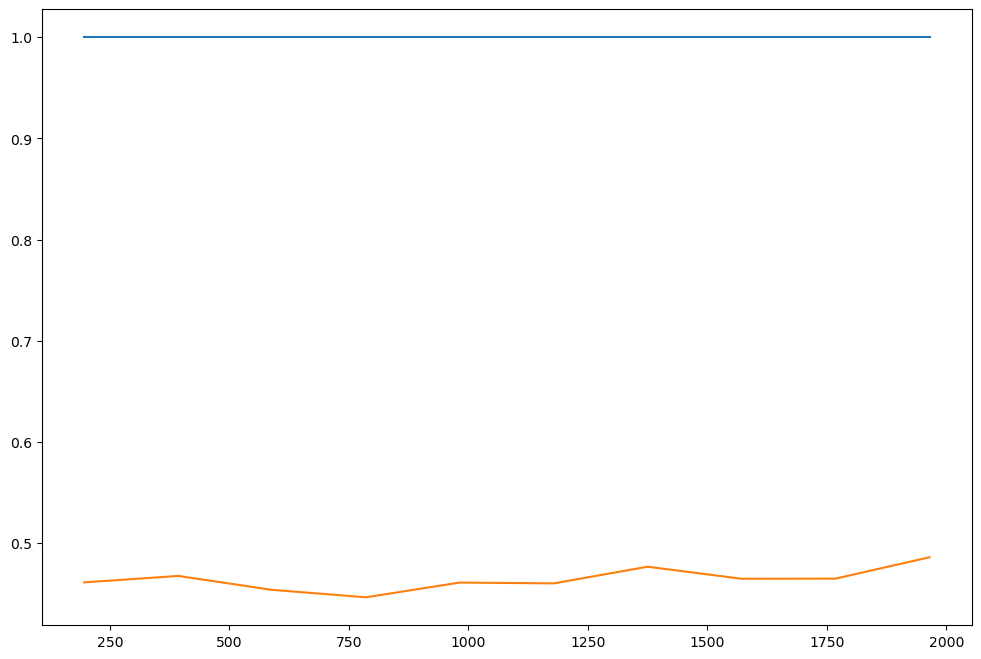

In [103]:
evaluation(model_DTC,df)

In [104]:
RandomForest=RandomForestClassifier()
AdaBoost=AdaBoostClassifier()
KNN=KNeighborsClassifier()
SGD_Classifier=SGDClassifier()
SVC=SVC()

In [105]:
list_of_model=[RandomForest,AdaBoost,KNN,SGD_Classifier,SVC]

RandomForestClassifier()
1.0
0.6935975609756098
[[366  46]
 [155  89]]
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       412
           1       0.66      0.36      0.47       244

    accuracy                           0.69       656
   macro avg       0.68      0.63      0.63       656
weighted avg       0.69      0.69      0.67       656

AdaBoostClassifier()
0.650381679389313
0.6204268292682927
[[360  52]
 [197  47]]
              precision    recall  f1-score   support

           0       0.65      0.87      0.74       412
           1       0.47      0.19      0.27       244

    accuracy                           0.62       656
   macro avg       0.56      0.53      0.51       656
weighted avg       0.58      0.62      0.57       656

KNeighborsClassifier()
0.7152671755725191
0.5396341463414634
[[294 118]
 [184  60]]
              precision    recall  f1-score   support

           0       0.62      0.71      0.66       412
 

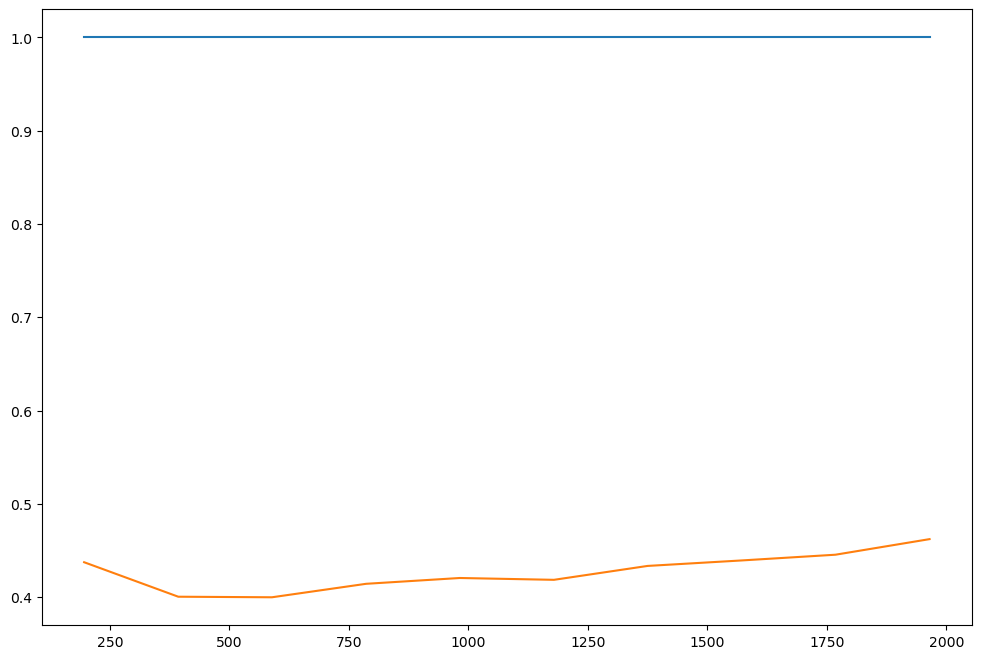

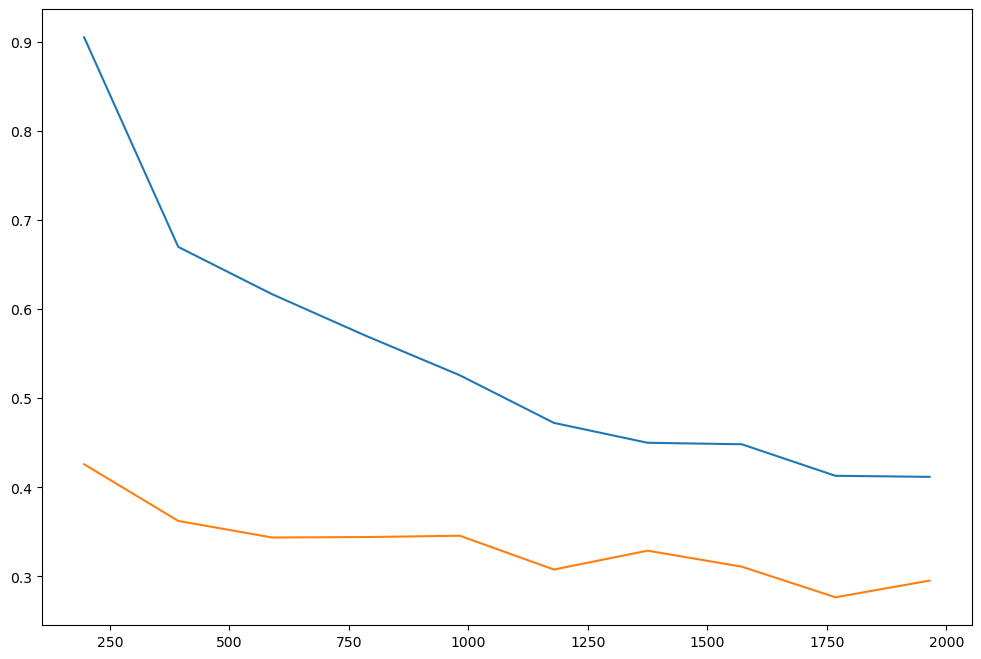

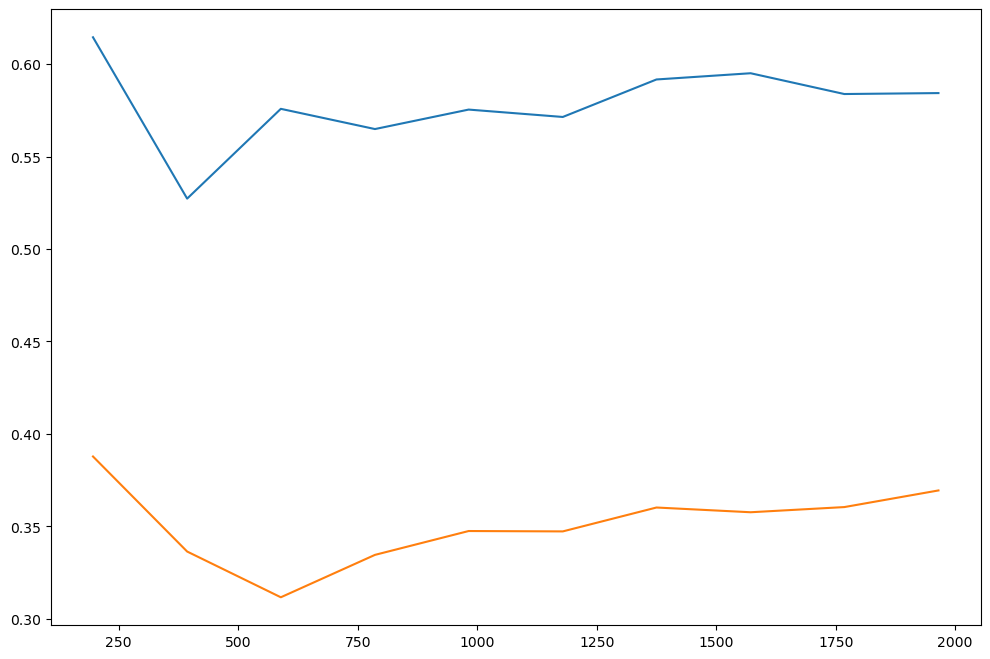

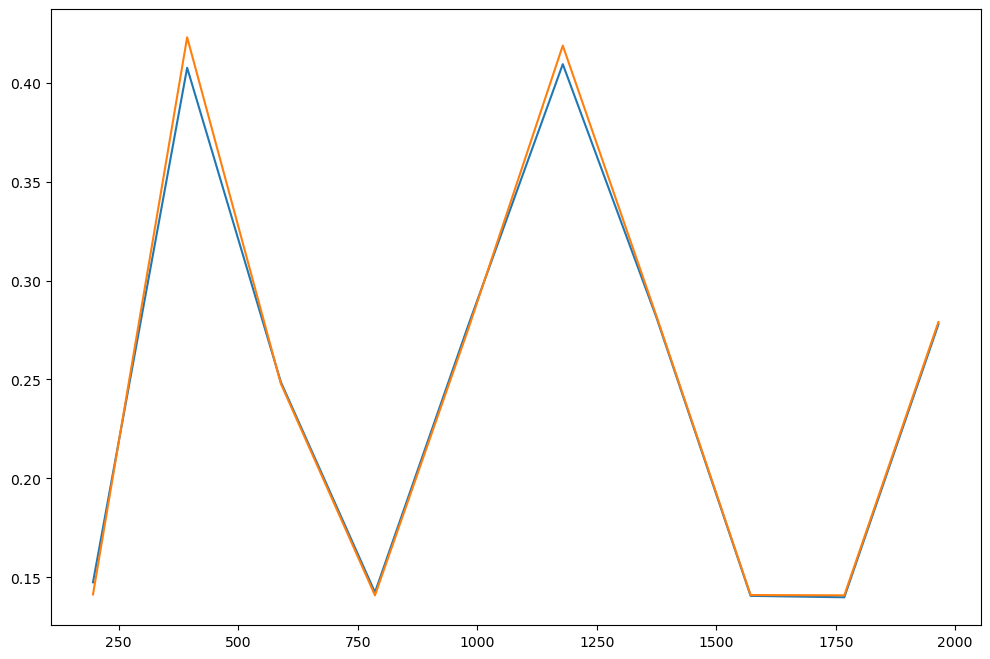

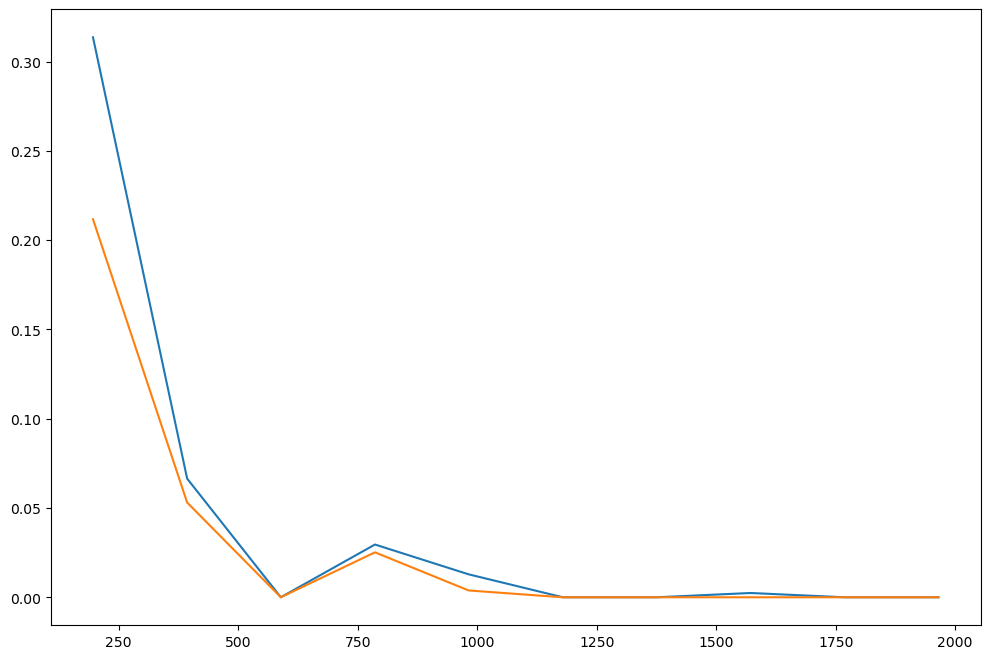

In [106]:
for model in list_of_model:
    print(model)
    evaluation(model,df)

In [107]:
preprocessor=make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif, k=4))

In [110]:
RandomForest_1=make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaBoost_1=make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
DTC_1=make_pipeline(preprocessor,DecisionTreeClassifier(random_state=0))
Logistic_Regression_1=make_pipeline(preprocessor,RobustScaler(),LogisticRegression())
KNN_1=make_pipeline(preprocessor,KNeighborsClassifier(n_neighbors=5))
SGD_Classifier_1=make_pipeline(preprocessor,RobustScaler(),SGDClassifier())
SVC_1=make_pipeline(preprocessor,RobustScaler(),SVC)


In [111]:
list_of_model_1=[DTC_1,RandomForest_1,AdaBoost_1,Logistic_Regression_1,KNN_1,SGD_Classifier_1,SVC_1]

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                                 ('selectkbest', SelectKBest(k=4))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=0))])
1.0
0.5137195121951219
[[237 175]
 [144 100]]
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       412
           1       0.36      0.41      0.39       244

    accuracy                           0.51       656
   macro avg       0.49      0.49      0.49       656
weighted avg       0.53      0.51      0.52       656

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                                 ('selectkbest', SelectKBest(k=4))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])
1.0
0.5807926829268293
[[320  92]
 [183  61]]
              preci

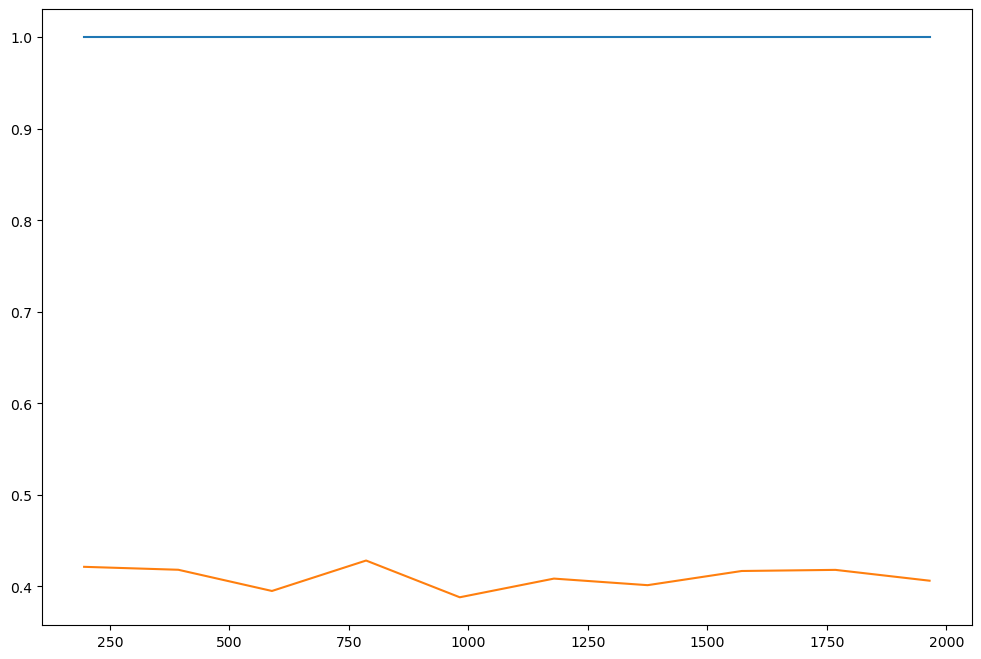

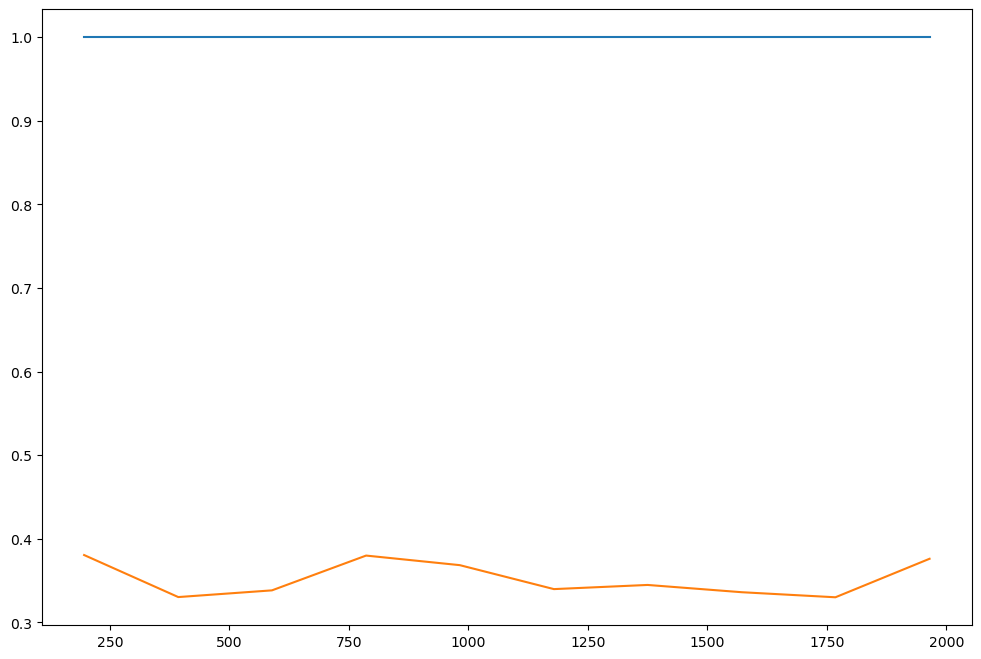

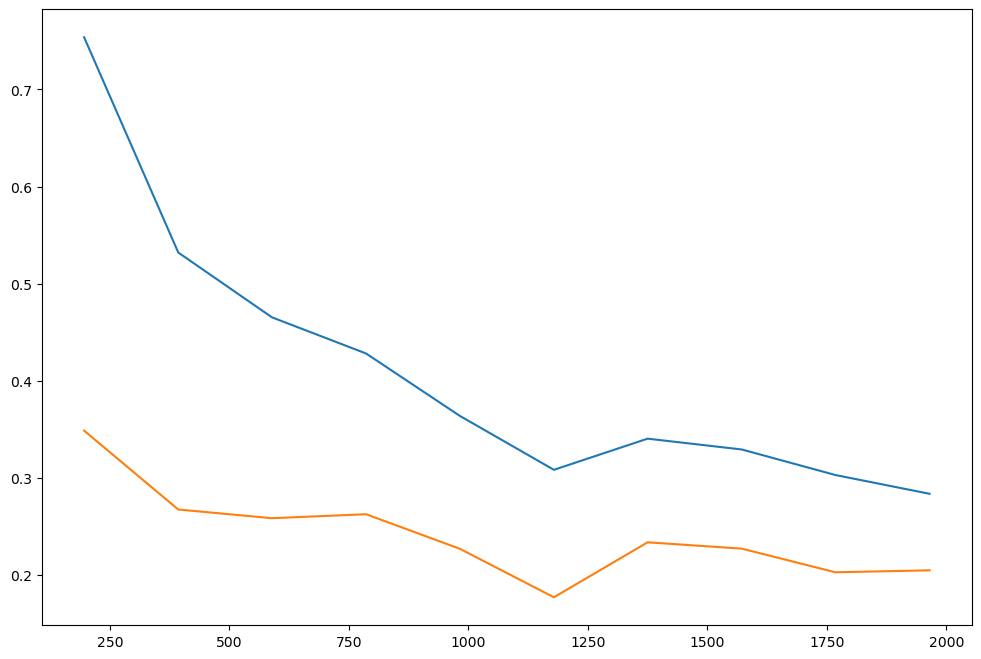

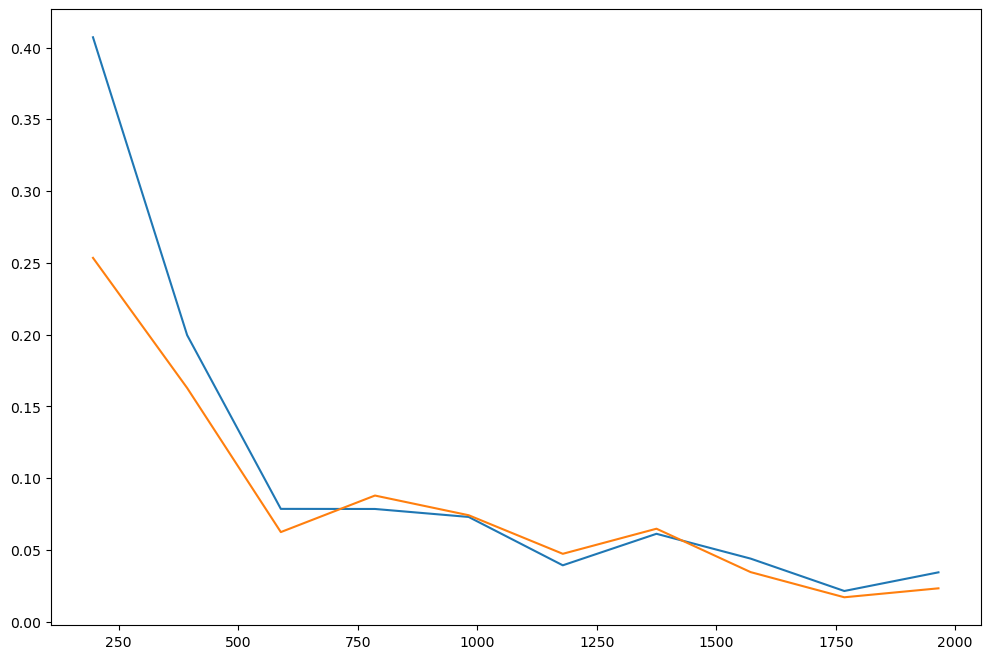

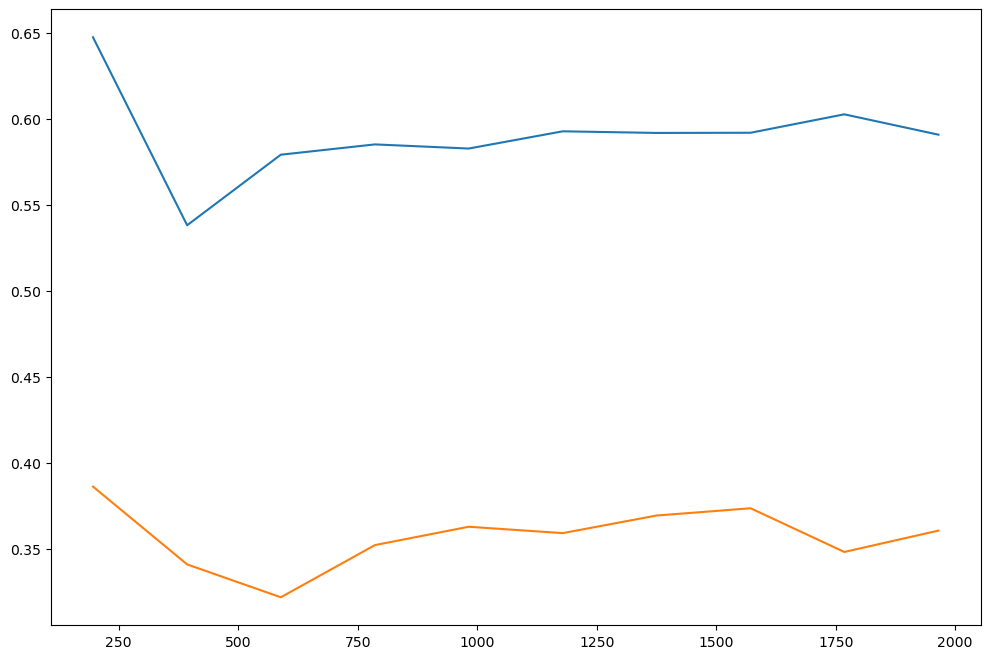

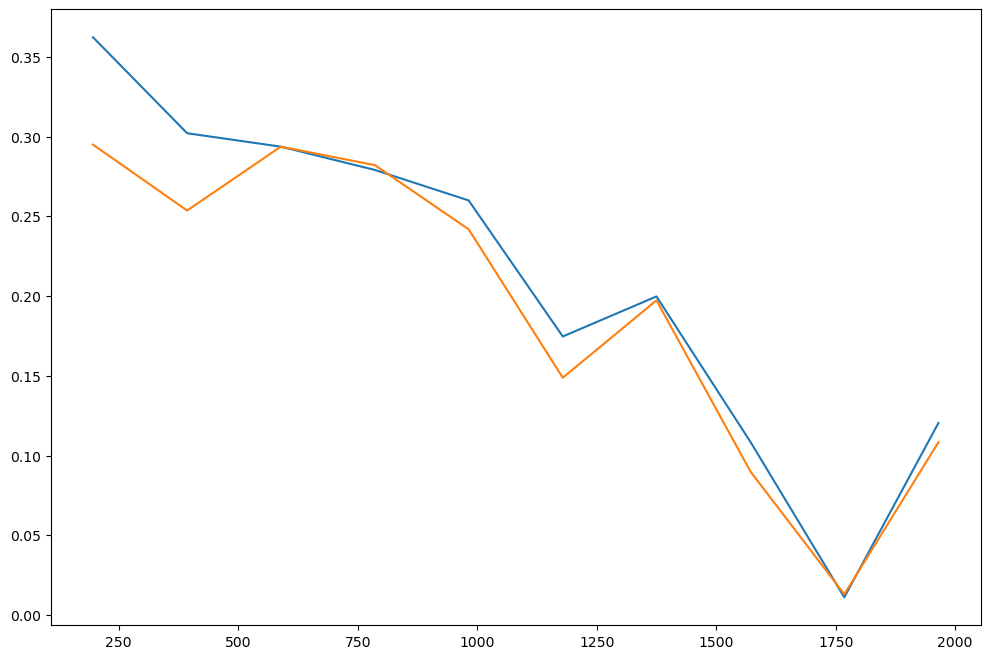

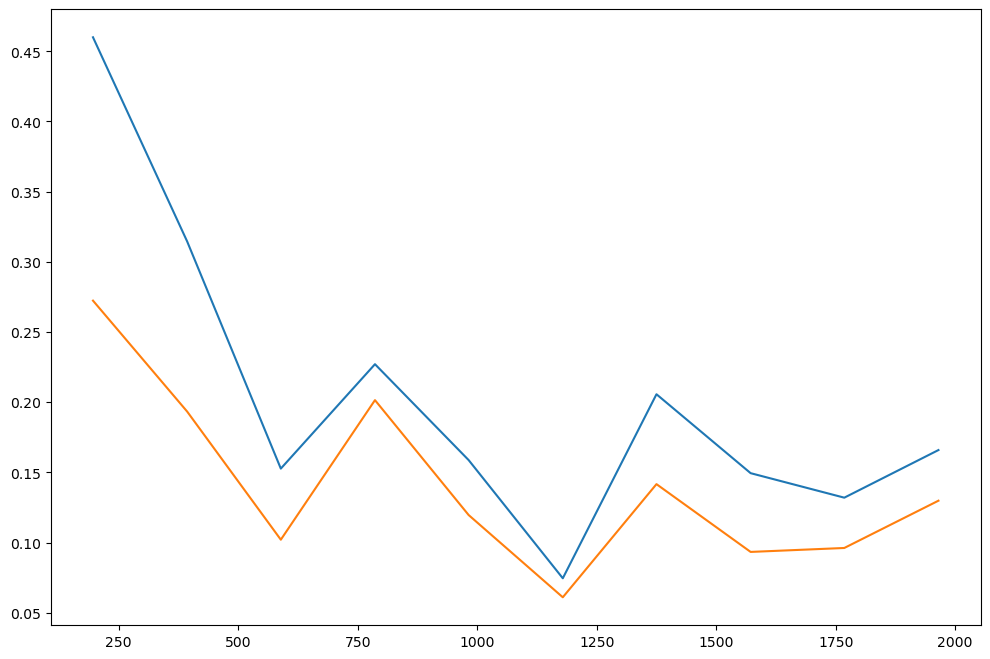

In [112]:
for model in list_of_model_1:
    print(model)
    evaluation(model,df)